In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import odeint  
import math

## Task 5a - control via IPTG induction

In [2]:
def sdot_repressilator1(s,t,params):  
    
    km, km0, kdm, kp, kdp, K, n, IPTG = params 
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI = s
        
    rate_m_tetR_prod = km*((K**n)/((K**n)+(IPTG*p_lacI**n)))+km0 
    rate_m_lacI_prod = km*((K**n)/((K**n)+(p_cI**n)))+km0 
    rate_m_cI_prod   = km*((K**n)/((K**n)+(p_tetR**n)))+km0
    
    rate_p_tetR_prod = kp*m_tetR
    rate_p_lacI_prod = kp*m_lacI
    rate_p_cI_prod   = kp*m_cI
    
    rate_m_tetR_loss = kdm*m_tetR
    rate_m_lacI_loss = kdm*m_lacI
    rate_m_cI_loss   = kdm*m_cI
    
    rate_p_tetR_loss = kdp*p_tetR
    rate_p_lacI_loss = kdp*p_lacI
    rate_p_cI_loss   = kdp*p_cI
    
    dm_tetR = rate_m_tetR_prod - rate_m_tetR_loss
    dm_lacI = rate_m_lacI_prod - rate_m_lacI_loss
    dm_cI   = rate_m_cI_prod - rate_m_cI_loss
    
    dp_tetR = rate_p_tetR_prod - rate_p_tetR_loss
    dp_lacI = rate_p_lacI_prod - rate_p_lacI_loss
    dp_cI   = rate_p_cI_prod - rate_p_cI_loss
    
    ds = [dm_tetR, dm_lacI, dm_cI, dp_tetR, dp_lacI, dp_cI]
    
    return ds 

### Overlay of p_tetR_obs when simulated using different 𝑿 values

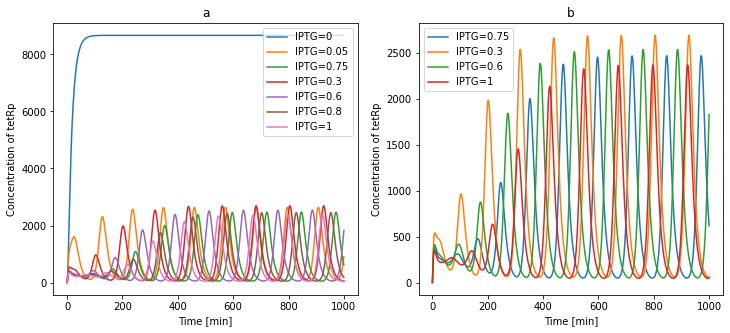

In [3]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 2

m_tetR0 = 0
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 5
p_lacI0 = 0
p_cI0   = 0

IPTG_vals = [0, 0.05, 0.75, 0.3, 0.6, 0.8, 1]

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax1, ax2 = ax

for IPTG in IPTG_vals: 
    params = [km, km0, kdm, kp, kdp, K, n, IPTG]


    #intitial condtions
    s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]


    # set time observations
    t_max = 1000
    t_obs = np.linspace(0,t_max,t_max+1)

    # run simulation
    s_obs1 = odeint(sdot_repressilator1,s0,t_obs,args=(params,))  

    m_tetR_obs1 = s_obs1[:,0]
    m_lacI_obs1 = s_obs1[:,1]
    m_cI_obs1 =   s_obs1[:,2]

    p_tetR_obs1 = s_obs1[:,3]
    p_lacI_obs1 = s_obs1[:,4]
    p_cI_obs1 =   s_obs1[:,5]
    
    ax1.plot(t_obs, p_tetR_obs1, label=f"IPTG={IPTG}")
    
IPTG_vals = [0.75, 0.3, 0.6, 1]

for IPTG in IPTG_vals: 
    params = [km, km0, kdm, kp, kdp, K, n, IPTG]


    #intitial condtions
    s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]


    # set time observations
    t_max = 1000
    t_obs = np.linspace(0,t_max,t_max+1)

    # run simulation
    s_obs2 = odeint(sdot_repressilator1,s0,t_obs,args=(params,))  

    m_tetR_obs2 = s_obs2[:,0]
    m_lacI_obs2 = s_obs2[:,1]
    m_cI_obs2 =   s_obs2[:,2]

    p_tetR_obs2 = s_obs2[:,3]
    p_lacI_obs2 = s_obs2[:,4]
    p_cI_obs2 =   s_obs2[:,5]
    
    ax2.plot(t_obs, p_tetR_obs2, label=f"IPTG={IPTG}")
    
ax1.set_title("a")   
ax1.set_xlabel("Time [min]")
ax1.set_ylabel("Concentration of tetRp")
ax2.set_title("b")
ax2.set_xlabel("Time [min]")
ax2.set_ylabel("Concentration of tetRp")

ax1.legend(loc="upper right")
ax2.legend(loc="upper left")

# plt.savefig("Task5_figure1.png")

In [4]:
# The peak_finder function that identifies the peaks in a sequence of observations
# it returns a list of identified maxima, with each item in the list
# storing peak time and peak height
# e.g. maxima =  peak_finder(t_obs, x_obs, 400)
# to examine first peak found with threshold set to 400
# peak_time   = maxima[0][0]
# peak_height = maxima[0][1]

def peak_finder(t_obs, x_obs, threshold=100):
    n_obs = len(t_obs)
    maxima = []
    minima = [] 
    # note minima are stored but not returned as we 
    # are only interested in maxima for this analysis
    
    # this stores the current seen maximum values
    stored_max_x = x_obs[0]
    stored_max_t = t_obs[0]
    
    # set search_dir to +1 to search for next maximum
    # set search_dir to -1 to search for next minimum

    search_dir = 1
    
    # initialise search direction (i.e. looking for max or min?)
    for i in range(n_obs):
        if x_obs[i]>x_obs[0]+threshold:
            # x initially increases, start by looking for max
            search_dir = 1
            break
        if x_obs[i]<x_obs[0]-threshold:
            # x initially decreases, start by looking for min
            search_dir = -1
            break
            
    # algorithm that runs the search
    for i in range(n_obs):
        if x_obs[i]*search_dir > stored_max_x*search_dir:
            stored_max_x = x_obs[i]
            stored_max_t = t_obs[i]
        if x_obs[i]*search_dir < stored_max_x*search_dir - threshold:
            if search_dir > 0:
                maxima.append((stored_max_t,stored_max_x))
            else:
                minima.append((stored_max_t,stored_max_x))
            stored_max_x = x_obs[i]
            stored_max_t = t_obs[i]
            search_dir = -1*search_dir
    return maxima

def freq_seek(t_obs, x_obs, peak):
    # utilising peak_finder() to calculate the frequency of obsed amplitudes
    
    peak_ts = [obs[0] for obs in peak_finder(t_obs, x_obs, peak)]
    dists = [peak_ts[idx+1]-peak_ts[idx] for idx in range(len(peak_ts)-1)]
    freq = np.mean(dists)
    
    return(freq)

In [5]:
IPTG_vals = np.linspace(0.005,1,200)
freq_vals = []
p_tetR_max_vals = []
p_tetR_min_vals = []

for IPTG in IPTG_vals:
    params = [km, km0, kdm, kp, kdp, K, n, IPTG]


    #intitial condtions
    s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]


    # set time observations
    t_max = 10000
    t_obs = np.linspace(0,t_max,t_max+1)

    # run simulation
    s_obs3 = odeint(sdot_repressilator1,s0,t_obs,args=(params,))  

    m_tetR_obs3 = s_obs3[:,0]
    m_lacI_obs3 = s_obs3[:,1]
    m_cI_obs3 =   s_obs3[:,2]

    p_tetR_obs3 = s_obs3[:,3]
    p_lacI_obs3 = s_obs3[:,4]
    p_cI_obs3 =   s_obs3[:,5]
    
    freq = freq_seek(range(0,499), p_tetR_obs3[-500:],400)
    freq_vals += [freq]
    
    p_tetR_max_vals += [np.max(p_tetR_obs3[-500:])]
    p_tetR_min_vals += [np.min(p_tetR_obs3[-500:])]

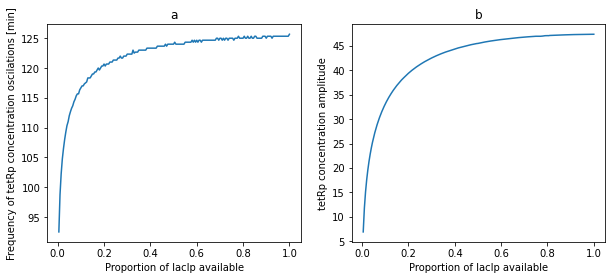

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax1, ax2 = ax

ax1.set_title("a")
ax1.plot(IPTG_vals, freq_vals)
ax1.set_xlabel("Proportion of lacIp available")
ax1.set_ylabel("Frequency of tetRp concentration oscilations [min]")

ax2.set_title("b")
ax2.plot(IPTG_vals, np.array(p_tetR_max_vals)/np.array(p_tetR_min_vals))
ax2.set_xlabel("Proportion of lacIp available")
ax2.set_ylabel("tetRp concentration amplitude")

# plt.savefig("Task5_figure2.png")

## Task 5b - control via protein degradation rate

In [7]:
def sdot_repressilator2(s,t,params):  
    
    km, km0, kdm, kp, kdp, K, n, Y = params 
    m_tetR, m_lacI, m_cI, p_tetR, p_lacI, p_cI = s
        
    rate_m_tetR_prod = km*((K**n)/((K**n)+(p_lacI**n)))+km0 
    rate_m_lacI_prod = km*((K**n)/((K**n)+(p_cI**n)))+km0 
    rate_m_cI_prod   = km*((K**n)/((K**n)+(p_tetR**n)))+km0
    
    rate_p_tetR_prod = kp*m_tetR
    rate_p_lacI_prod = kp*m_lacI
    rate_p_cI_prod   = kp*m_cI
    
    rate_m_tetR_loss = Y*kdm*m_tetR
    rate_m_lacI_loss = Y*kdm*m_lacI
    rate_m_cI_loss   = Y*kdm*m_cI
    
    rate_p_tetR_loss = kdp*p_tetR
    rate_p_lacI_loss = kdp*p_lacI
    rate_p_cI_loss   = kdp*p_cI
    
    dm_tetR = rate_m_tetR_prod - rate_m_tetR_loss
    dm_lacI = rate_m_lacI_prod - rate_m_lacI_loss
    dm_cI   = rate_m_cI_prod - rate_m_cI_loss
    
    dp_tetR = rate_p_tetR_prod - rate_p_tetR_loss
    dp_lacI = rate_p_lacI_prod - rate_p_lacI_loss
    dp_cI   = rate_p_cI_prod - rate_p_cI_loss
    
    ds = [dm_tetR, dm_lacI, dm_cI, dp_tetR, dp_lacI, dp_cI]
    
    return ds 

### Overlay of p_tetR_obs when simulated using different 𝒀 values

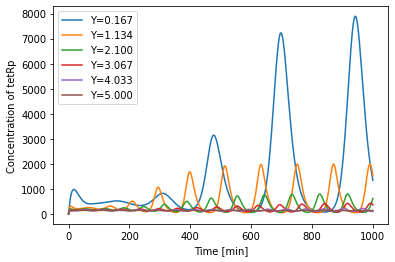

In [8]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 2

m_tetR0 = 0
m_lacI0 = 0
m_cI0   = 0

p_tetR0 = 5
p_lacI0 = 0
p_cI0   = 0

Y_vals = np.linspace(0.167,5,6)
p_tetR_vals = []

fig, ax = plt.subplots(1,1)

for Y in Y_vals: 
    params = [km, km0, kdm, kp, kdp, K, n, Y]


    #intitial condtions
    s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]


    # set time observations
    t_max = 1000
    t_obs = np.linspace(0,t_max,t_max+1)

    # run simulation
    s_obs4 = odeint(sdot_repressilator2,s0,t_obs,args=(params,))  

    m_tetR_obs4 = s_obs4[:,0]
    m_lacI_obs4 = s_obs4[:,1]
    m_cI_obs4 =   s_obs4[:,2]

    p_tetR_obs4 = s_obs4[:,3]
    p_lacI_obs4 = s_obs4[:,4]
    p_cI_obs4 =   s_obs4[:,5]
    
    ax.plot(t_obs, p_tetR_obs4, label=f"Y={Y:.3f}")
    
ax.set_xlabel("Time [min]")
ax.set_ylabel("Concentration of tetRp")
ax.legend()
# plt.savefig("Task5_figure3.png")

In [9]:
Y_vals = Y_vals = np.linspace(0.167,5,100)
freq_vals = []
p_tetR_max_vals = []
p_tetR_min_vals = []

for Y in Y_vals:
    params = [km, km0, kdm, kp, kdp, K, n, Y]


    #intitial condtions
    s0 = [m_tetR0, m_lacI0, m_cI0, p_tetR0, p_lacI0, p_cI0]


    # set time observations
    t_max = 10000
    t_obs = np.linspace(0,t_max,t_max+1)

    # run simulation
    s_obs5 = odeint(sdot_repressilator2,s0,t_obs,args=(params,))  

    m_tetR_obs5 = s_obs5[:,0]
    m_lacI_obs5 = s_obs5[:,1]
    m_cI_obs5 =   s_obs5[:,2]

    p_tetR_obs5 = s_obs5[:,3]
    p_lacI_obs5 = s_obs5[:,4]
    p_cI_obs5 =   s_obs5[:,5]
    
    freq = freq_seek(range(0,499), p_tetR_obs3[-500:],400)
    freq_vals += [freq]
    
    p_tetR_max_vals += [np.max(p_tetR_obs5[-500:])]
    p_tetR_min_vals += [np.min(p_tetR_obs5[-500:])]

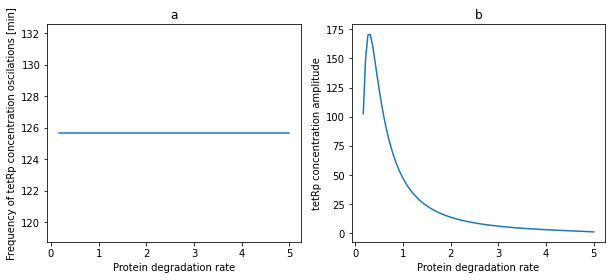

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax1, ax2 = ax

ax1.set_title("a")
ax1.plot(Y_vals, freq_vals)
ax1.set_xlabel("Protein degradation rate")
ax1.set_ylabel("Frequency of tetRp concentration oscilations [min]")

ax2.set_title("b")
ax2.plot(Y_vals, np.array(p_tetR_max_vals)/np.array(p_tetR_min_vals))
ax2.set_xlabel("Protein degradation rate")
ax2.set_ylabel("tetRp concentration amplitude")

# plt.savefig("Task5_figure4.png")